## Figure 2

Code to reproduce Figure 2 - Stratospheric sulfur burden averaged globally, over Antarctica and SH mid-latitudes.

Data used:
- Global mean ensemble mean stratospheric sulfur burden
    - filenames: *_strat_sulfur_mean_ensemble.nc
- Global gridded stratospheric sulfur burden for each ensemble member
    - filenames: *strat_sulfur_grid_all_ensemble.nc

## Import packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rc('font', size=16)   
plt.rc('axes', titlesize=16)    
plt.rc('axes', labelsize=16)   
plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=16)    
plt.rc('legend', fontsize=16)  
plt.rc('figure', titlesize=20) 

## Read files

In [3]:
os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/Sulfur_species_monthly')

volc_scenario = ['novolc','volc25','volc50','volc50_1s','volc50_2','volc50_2s','volc98']

# Global mean ensemble mean stratospheric sulfur burden
file_string = '_ssp370_strat_sulfur_mean_ensemble.nc'
s_mean = {}
for scenario in volc_scenario:
    file_name = scenario + file_string
    dataset = xr.open_dataset(file_name)
    s_mean[scenario] = dataset['strat_sulfur_mean'][:]

# stratospheric sulfur burden at each grid for each ensemble member
file_string = '_ssp370_strat_sulfur_grid_all_ensemble.nc'
grid_all = {}
for scenario in volc_scenario:
    file_name = scenario + file_string
    dataset = xr.open_dataset(file_name)
    grid_all[scenario] = dataset['strat_sulfur_grid'][:]

In [4]:
def calc_south_pole_s_burden(df):
    
    temp = df[:,:,0:24,:].sum(dim=['latitude','longitude']) # sum over 60S - 90S latitude
    ens_mean = (temp[0,:] + temp[1,:] + temp[2,:]) / 3

    return ens_mean

def calc_south_midlat_s_burden(df):
    
    temp = df[:,:,24:48,:].sum(dim=['latitude','longitude']) # sum over 30S - 60S latitude
    ens_mean = (temp[0,:] + temp[1,:] + temp[2,:]) / 3

    return ens_mean

## Plots

Text(0.0, 1.0, 'Stratospheric sulfur burden averaged over SH mid-latitudes')

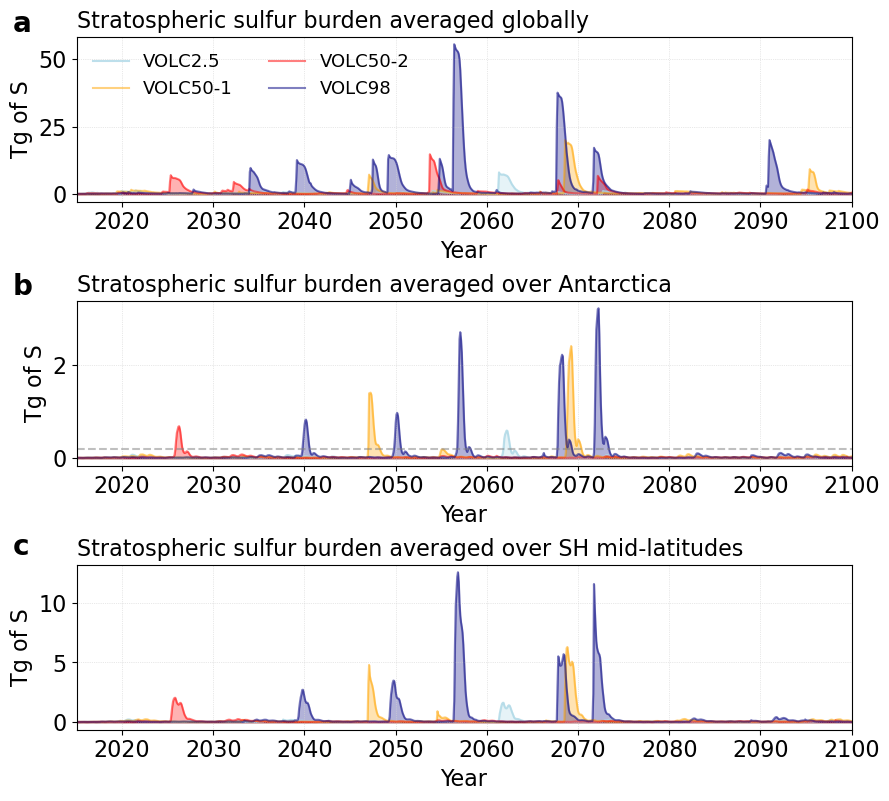

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,9),dpi=100)
plt.subplots_adjust(hspace=0.6)
ax1.grid(ls='dotted',color='lightgrey', lw = 0.5)
ax2.grid(ls='dotted',color='lightgrey', lw = 0.5)
ax3.grid(ls='dotted',color='lightgrey', lw = 0.5)
daysince = np.arange(2015,2101,1/12)

# Panel a
ax1.fill_between(daysince, (s_mean['volc25']), 0, alpha=0.3, color='lightblue')
ax1.fill_between(daysince, (s_mean['volc50']), 0, alpha=0.3, color='orange')
ax1.fill_between(daysince, (s_mean['volc50_2']), 0, alpha=0.3, color='red')
ax1.fill_between(daysince, (s_mean['volc98']), 0, alpha=0.3, color='navy')
ax1.plot(daysince, (s_mean['volc25']), label = 'VOLC2.5', color = 'lightblue', lw=1.5, alpha=0.8)
ax1.plot(daysince, (s_mean['volc50']), label = 'VOLC50-1', color = 'orange', lw=1.5, alpha=0.5)
ax1.plot(daysince, (s_mean['volc50_2']), label = 'VOLC50-2', color = 'red', lw=1.5, alpha=0.5)
ax1.plot(daysince, (s_mean['volc98']), label = 'VOLC98', color = 'navy', lw=1.5, alpha=0.5)

# Panel b 
ax2.fill_between(daysince, calc_south_pole_s_burden(grid_all['volc25']), 0, alpha=0.3, color='lightblue')
ax2.fill_between(daysince, calc_south_pole_s_burden(grid_all['volc50']), 0, alpha=0.3, color='orange')
ax2.fill_between(daysince, calc_south_pole_s_burden(grid_all['volc50_2']), 0, alpha=0.3, color='red')
ax2.fill_between(daysince, calc_south_pole_s_burden(grid_all['volc98']), 0, alpha=0.3, color='navy')
ax2.plot(daysince, calc_south_pole_s_burden(grid_all['volc25']), label = 'VOLC2.5', color = 'lightblue', lw=1.5, alpha=0.8)
ax2.plot(daysince, calc_south_pole_s_burden(grid_all['volc50']), label = 'VOLC50-1', color = 'orange', lw=1.5, alpha=0.5)
ax2.plot(daysince, calc_south_pole_s_burden(grid_all['volc50_2']), label = 'VOLC50-2', color = 'red', lw=1.5, alpha=0.5)
ax2.plot(daysince, calc_south_pole_s_burden(grid_all['volc98']), label = 'VOLC98', color = 'navy', lw=1.5, alpha=0.5)
ax2.axhline(0.2, color = 'grey', alpha = 0.5, ls = '--')

# Panel c
ax3.fill_between(daysince, calc_south_midlat_s_burden(grid_all['volc25']), 0, alpha=0.3, color='lightblue')
ax3.fill_between(daysince, calc_south_midlat_s_burden(grid_all['volc50']), 0, alpha=0.3, color='orange')
ax3.fill_between(daysince, calc_south_midlat_s_burden(grid_all['volc50_2']), 0, alpha=0.3, color='red')
ax3.fill_between(daysince, calc_south_midlat_s_burden(grid_all['volc98']), 0, alpha=0.3, color='navy')
ax3.plot(daysince, calc_south_midlat_s_burden(grid_all['volc25']), label = 'VOLC2.5', color = 'lightblue', lw=1.5, alpha=0.8)
ax3.plot(daysince, calc_south_midlat_s_burden(grid_all['volc50']), label = 'VOLC50-1', color = 'orange', lw=1.5, alpha=0.5)
ax3.plot(daysince, calc_south_midlat_s_burden(grid_all['volc50_2']), label = 'VOLC50-2', color = 'red', lw=1.5, alpha=0.5)
ax3.plot(daysince, calc_south_midlat_s_burden(grid_all['volc98']), label = 'VOLC98', color = 'navy', lw=1.5, alpha=0.5)

# Figure adjustments
ax1.text(2008, 60, 'a', fontsize = 20, fontweight='bold')
ax1.set_ylabel('Tg of S')
ax1.set_xlim(2015,2100)
ax1.set_xlabel('Year')
ax1.legend(loc="upper left", ncol = 2, fontsize = 13,frameon=False)
ax1.set_title('Stratospheric sulfur burden averaged globally', loc = 'left', fontsize = 16)

ax2.text(2008, 3.5, 'b', fontsize = 20, fontweight='bold')
ax2.set_ylabel('Tg of S')
ax2.set_xlim(2015,2100)
ax2.set_xlabel('Year')
ax2.set_title('Stratospheric sulfur burden averaged over Antarctica', loc='left',fontsize = 16)

ax3.text(2008, 14, 'c', fontsize = 20, fontweight='bold')
ax3.set_ylabel('Tg of S')
ax3.set_xlim(2015,2100)
ax3.set_xlabel('Year')
ax3.set_title('Stratospheric sulfur burden averaged over SH mid-latitudes', loc='left',fontsize = 16)
